# Presentación

**Comisión 3 - Grupo 6**

**Integrantes**

* Antuña, Federico
* Fernández, Florencia
* Salvañá, Leandro

## Estructuras de datos

**Para leer de los archivos de Airbnb**

```json
{
    "neighbourhood_1": {
        "room_type_1": {
            "availability_sum": <number>,
            "price_sum": <number>,
            "rating_sum": <number>,
            "counter": <number>
        },
        "room_type_2": {
            "availability_sum": <number>,
            "price_sum": <number>,
            "rating_sum": <number>,
            "counter": <number>
        },
        "room_type_3": {
            "availability_sum": <number>,
            "price_sum": <number>,
            "rating_sum": <number>,
            "counter": <number>
        }
    },
    "neighbourhood_2": {
        "room_type_1": {
            "availability_sum": <number>,
            "price_sum": <number>,
            "rating_sum": <number>,
            "counter": <number>
        },
        "room_type_2": {
            "availability_sum": <number>,
            "price_sum": <number>,
            "rating_sum": <number>,
            "counter": <number>
        },
        "room_type_3": {
            "availability_sum": <number>,
            "price_sum": <number>,
            "rating_sum": <number>,
            "counter": <number>
        }
    },
    .
    .
    .
}
```

**Procesada, para los gráficos**

```json
{
    "neighbourhoods": [
        "neighbourhood_1",
        "neighbourhood_2",
        "neighbourhood_3",
        .
        .
        .
    ],
    "room_type_1_occupancy": [
        <number>,
        <number>,
        <number>,
        .
        .
        .
    ],
    "room_type_1_price": [
        <number>,
        <number>,
        <number>,
        .
        .
        .
    ],
    "room_type_1_rating": [
        <number>,
        <number>,
        <number>,
        .
        .
        .
    ],
    "room_type_2_occupancy": [
        <number>,
        <number>,
        <number>,
        .
        .
        .
    ],
    "room_type_2_price": [
        <number>,
        <number>,
        <number>,
        .
        .
        .
    ],
    "room_type_2_rating": [
        <number>,
        <number>,
        <number>,
        .
        .
        .
    ],
    "room_type_3_occupancy": [
        <number>,
        <number>,
        <number>,
        .
        .
        .
    ],
    "room_type_3_price": [
        <number>,
        <number>,
        <number>,
        .
        .
        .
    ],
    "room_type_3_rating": [
        <number>,
        <number>,
        <number>,
        .
        .
        .
    ],
    .
    .
    .
}
```

## Preguntas a responder

1. ¿Cuál es el **Precio Promedio** por **Tipo de Habitación** en cada **Barrio**?
2. ¿Cuál es la **Calificación (Rating) Promedio** por **Tipo de Habitación** en cada **Barrio**?
3. ¿Cuál es el **Porcentaje de Ocupación Promedio** por **Tipo de Habitación** en cada **Barrio** y que correlación existe con los **precios** y **calificaciones**?

### Carga de datos

In [1]:
import csv, gzip

def normalize_price(price):
    return float(price[1:].replace(',',''))

def get_calendar_data():
    data = {}

    with gzip.open('./files/calendar.csv.gz', 'rt', encoding='utf-8') as file:
        reader = csv.reader(file, delimiter=',')

        header = next(reader)
        listing_id_index = header.index('listing_id')
        available_index = header.index('available')

        for row in reader:        
            listing_id = row[listing_id_index]
            available = row[available_index]

            if listing_id not in data.keys():
                data[listing_id] = 0

            if available == 'f':
                data[listing_id] += 1

    return data

def get_listings_data(calendar_data):
    data = {}
    neighbourhoods = []
    room_types = []

    with gzip.open('./files/listings.csv.gz', 'rt', encoding='utf-8') as listings:
        listings_reader = csv.reader(listings, delimiter=',')

        listings_header = next(listings_reader)

        listing_id_index = listings_header.index('id')
        listing_price_index = listings_header.index('price')
        listing_rating_index = listings_header.index('review_scores_rating')
        listing_neighbourhood_index = listings_header.index('neighbourhood_cleansed')
        listing_room_type_index = listings_header.index('room_type')

        for row in listings_reader:
            listing_id = row[listing_id_index]
            if listing_id not in calendar_data.keys():
                continue

            price = row[listing_price_index]
            if price == '':
                continue

            rating = row[listing_rating_index]
            if rating == '':
                continue

            price = normalize_price(price)
            rating = float(rating)
            neighbourhood = row[listing_neighbourhood_index]
            room_type = row[listing_room_type_index]
            occupancy_percentage = calendar_data[listing_id] / 365

            if neighbourhood not in data.keys():
                data[neighbourhood] = {
                    room_type: {
                        'occupancy_percentage_sum': 0,
                        'price_sum': 0,
                        'rating_sum': 0,
                        'counter': 0
                    }
                }

            if room_type not in data[neighbourhood].keys():
                data[neighbourhood][room_type] = {
                    'occupancy_percentage_sum': 0,
                    'price_sum': 0,
                    'rating_sum': 0,
                    'counter': 0
                }

            data[neighbourhood][room_type]['occupancy_percentage_sum'] += occupancy_percentage
            data[neighbourhood][room_type]['price_sum'] += price
            data[neighbourhood][room_type]['rating_sum'] += rating
            data[neighbourhood][room_type]['counter'] += 1

            if neighbourhood not in neighbourhoods:
                neighbourhoods.append(neighbourhood)
            if room_type not in room_types:
                room_types.append(room_type)

    return (data, neighbourhoods, room_types)
    
def read_airbnb_data():
    calendar_data = get_calendar_data()
    return get_listings_data(calendar_data)

(airbnb_data, neighbourhoods, room_types) = read_airbnb_data()

print('Barrios: ', neighbourhoods)
print('Tipos de Habitación: ', room_types)
print('Estructura de Datos:', airbnb_data)

Barrios:  ['Nrrebro', 'Indre By', 'Vesterbro-Kongens Enghave', 'sterbro', 'Amager Vest', 'Frederiksberg', 'Amager st', 'Valby', 'Vanlse', 'Brnshj-Husum', 'Bispebjerg']
Tipos de Habitación:  ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']
Estructura de Datos: {'Nrrebro': {'Entire home/apt': {'occupancy_percentage_sum': 1064.7013698630137, 'price_sum': 1243846.0, 'rating_sum': 6039.670000000007, 'counter': 1264}, 'Private room': {'occupancy_percentage_sum': 117.96438356164379, 'price_sum': 83584.0, 'rating_sum': 712.42, 'counter': 151}, 'Shared room': {'occupancy_percentage_sum': 0.9205479452054794, 'price_sum': 800.0, 'rating_sum': 9.6, 'counter': 2}}, 'Indre By': {'Entire home/apt': {'occupancy_percentage_sum': 898.3726027397265, 'price_sum': 2201621.0, 'rating_sum': 6310.490000000007, 'counter': 1337}, 'Private room': {'occupancy_percentage_sum': 82.24383561643835, 'price_sum': 66861.0, 'rating_sum': 532.2100000000002, 'counter': 115}, 'Hotel room': {'occupancy_percen

### Preparación de los datos

In [2]:
import numpy as np

def average(summation, quantity):
    average = round(summation / quantity , 2)
    return average

def normalize_str(input):
    return input.upper().replace(' ', '_').replace('/', '_')

def filter_average_data_by_neighbourhood_by_room_type(data, neighbourhood, room_type):
    if room_type in data[neighbourhood].keys():
        occupancy_percentage_sum = data[neighbourhood][room_type]['occupancy_percentage_sum'] * 100
        price_sum = data[neighbourhood][room_type]['price_sum']
        rating_sum = data[neighbourhood][room_type]['rating_sum']
        counter = data[neighbourhood][room_type]['counter']
    else:
        occupancy_percentage_sum = np.nan
        price_sum = np.nan
        rating_sum = np.nan
        counter = 0

    if counter != 0:
        average_occupancy = average(occupancy_percentage_sum, counter)
        average_price = average(price_sum, counter)
        average_rating = average(rating_sum, counter)
    else:
        average_occupancy = np.nan
        average_price = np.nan
        average_rating = np.nan

    return (average_occupancy, average_price, average_rating)

def generate_plot_data(room_type, average_occupancy, average_price, average_rating):
    normalized_room_type = normalize_str(room_type)

    if f'_{normalized_room_type}_occupancy' not in globals():
        globals()[f'_{normalized_room_type}_occupancy'] = []
    if f'_{normalized_room_type}_price' not in globals():
        globals()[f'_{normalized_room_type}_price'] = []
    if f'_{normalized_room_type}_rating' not in globals():
        globals()[f'_{normalized_room_type}_rating'] = []

    globals()[f'_{normalized_room_type}_occupancy'].append(average_occupancy)
    globals()[f'_{normalized_room_type}_price'].append(average_price)
    globals()[f'_{normalized_room_type}_rating'].append(average_rating)

for neighbourhood in neighbourhoods:
        for room_type in room_types:
            (average_occupancy, average_price, average_rating) = filter_average_data_by_neighbourhood_by_room_type(airbnb_data, neighbourhood, room_type)
            generate_plot_data(room_type, average_occupancy, average_price, average_rating)

### **Precio Promedio** por **Tipo de Habitación** en cada **Barrio**

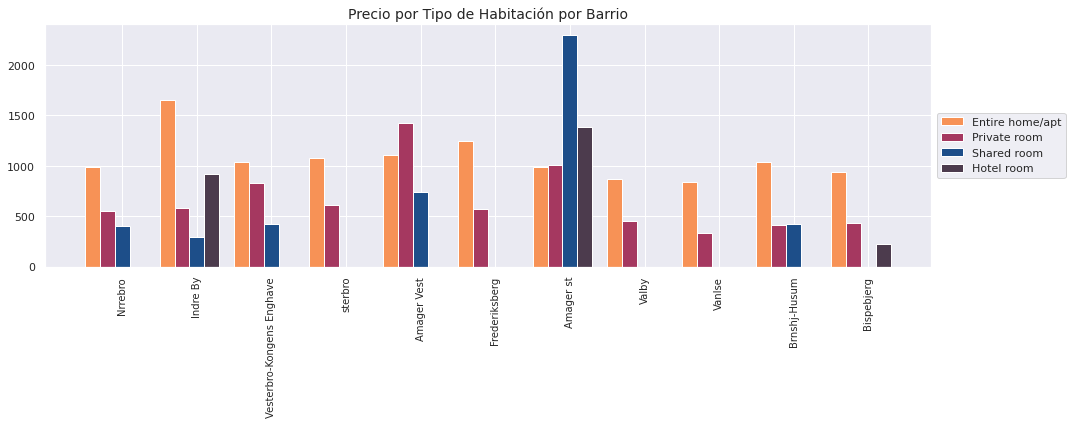

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def normalize_str_list(input):
    normalized_input = {}

    for input_item in input:
        normalized_room_type = normalize_str(input_item)
        if normalized_room_type not in normalized_input.keys():
            normalized_input[normalized_room_type] = input_item

    return normalized_input

def get_relative_distances(width, bars):
    start = -0.5 * len(bars)

    positions = {}

    for idx, current_bar in enumerate(bars):
        positions[current_bar] = (start + idx) * width

    return positions

def plot_bars(normalized_room_types, color_palette, axs, x, width, y):
    relative_distances = get_relative_distances(width, normalized_room_types.keys())

    for normalized_room_type in normalized_room_types.keys():
        values = globals()[f'_{normalized_room_type}_{y}']

        selected_color = next(color_palette)

        for ax in axs:
            ax.bar(x + relative_distances[normalized_room_type], values, width, label=normalized_room_types[normalized_room_type], color = selected_color)

def plot_average_price_per_room_type_per_neighbourhood():
    sns.set()

    title = 'Precio por Tipo de Habitación por Barrio'
    x = np.arange(len(neighbourhoods))
    y = 'price'
    width = 0.20
    normalized_room_types = normalize_str_list(room_types)

    fig, ax = plt.subplots()
    color_palette = iter(['#f79256', '#a53860','#1d4e89', '#4c3b4d'])
    plot_bars(normalized_room_types, color_palette, [ax], x, width, y)

    ax.set_title(title, fontsize = 14)
    ax.set_xticks(x, neighbourhoods, rotation = 90, fontsize = 10)
    ax.legend(loc='center left', bbox_to_anchor = (1, 0.5), fancybox = True, ncol = 1)

    fig.set_figheight(6)
    fig.set_figwidth(15)
    fig.tight_layout()

    plt.show()

plot_average_price_per_room_type_per_neighbourhood()

### **Calificación Promedia** por **Tipo de Habitación** en cada **Barrio**

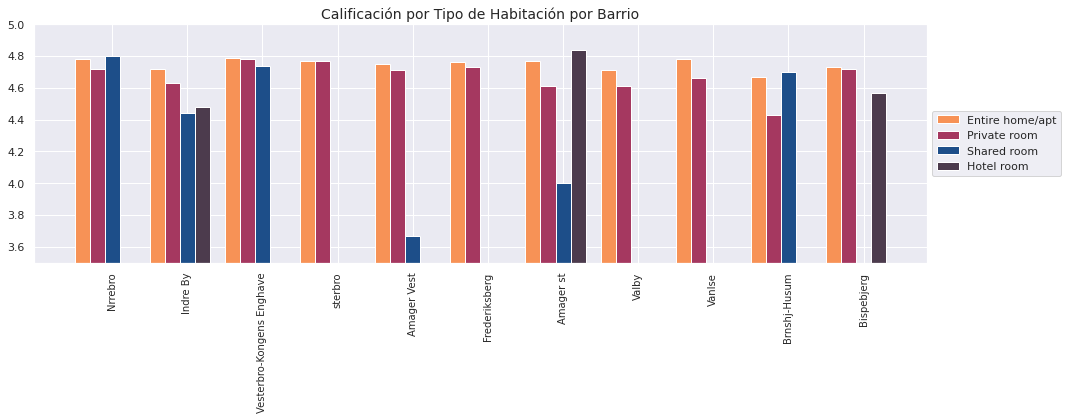

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def normalize_str_list(input):
    normalized_input = {}

    for input_item in input:
        normalized_room_type = normalize_str(input_item)
        if normalized_room_type not in normalized_input.keys():
            normalized_input[normalized_room_type] = input_item

    return normalized_input

def get_relative_distances(width, bars):
    start = -0.5 * len(bars)

    positions = {}

    for idx, current_bar in enumerate(bars):
        positions[current_bar] = (start + idx) * width

    return positions

def plot_bars(normalized_room_types, color_palette, axs, x, width, y):
    relative_distances = get_relative_distances(width, normalized_room_types.keys())

    for normalized_room_type in normalized_room_types.keys():
        values = globals()[f'_{normalized_room_type}_{y}']

        selected_color = next(color_palette)

        for ax in axs:
            ax.bar(x + relative_distances[normalized_room_type], values, width, label=normalized_room_types[normalized_room_type], color = selected_color)

def plot_average_price_per_room_type_per_neighbourhood():
    sns.set()

    title = 'Calificación por Tipo de Habitación por Barrio'
    x = np.arange(len(neighbourhoods))
    y = 'rating'
    width = 0.20
    normalized_room_types = normalize_str_list(room_types)

    fig, ax = plt.subplots()
    color_palette = iter(['#f79256', '#a53860','#1d4e89', '#4c3b4d'])
    plot_bars(normalized_room_types, color_palette, [ax], x, width, y)

    ax.set_title(title, fontsize = 14)
    ax.set_xticks(x, neighbourhoods, rotation = 90, fontsize = 10)
    ax.legend(loc='center left', bbox_to_anchor = (1, 0.5), fancybox = True, ncol = 1)

    ax.set_ylim([3.5, 5])

    fig.set_figheight(6)
    fig.set_figwidth(15)
    fig.tight_layout()

    plt.show()

plot_average_price_per_room_type_per_neighbourhood()

### **Porcentaje de Ocupación Promedio** por **Tipo de Habitación** en cada **Barrio** y correlación entre los **precios** y **calificaciones**

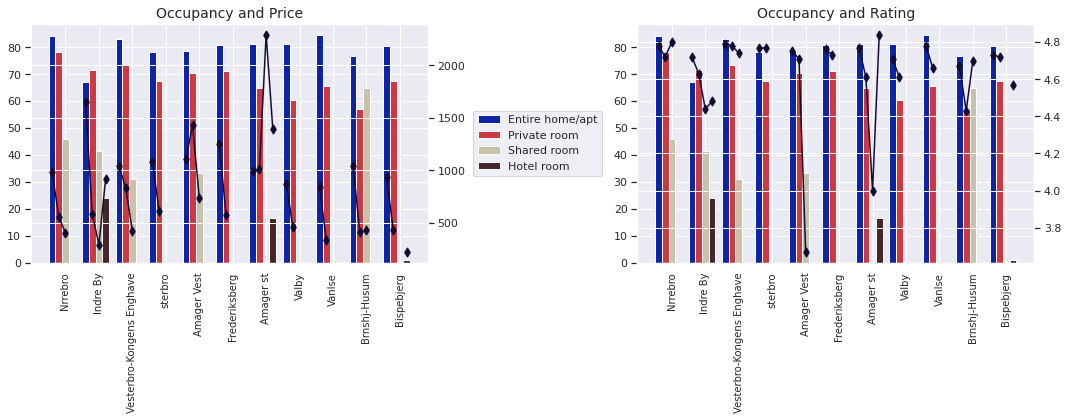

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def normalize_str_list(input):
    normalized_input = {}

    for input_item in input:
        normalized_room_type = normalize_str(input_item)
        if normalized_room_type not in normalized_input.keys():
            normalized_input[normalized_room_type] = input_item

    return normalized_input

def get_relative_distances(width, bars):
    start = -0.5 * len(bars)

    positions = {}

    for idx, current_bar in enumerate(bars):
        positions[current_bar] = (start + idx) * width

    return positions

def plot_bars(normalized_room_types, color_palette, axs, x, width, y):
    relative_distances = get_relative_distances(width, normalized_room_types.keys())

    for normalized_room_type in normalized_room_types.keys():
        values = globals()[f'_{normalized_room_type}_{y}']

        selected_color = next(color_palette)

        for ax in axs:
            ax.bar(x + relative_distances[normalized_room_type], values, width, label=normalized_room_types[normalized_room_type], color = selected_color)
    
def plot_scatters(normalized_room_types, color, axs, x, y, width, marker = 'd', linewidths = 1.5):
    relative_distances = get_relative_distances(width, normalized_room_types.keys())

    for idx in range(len(y)):
        for normalized_room_type in normalized_room_types.keys():
            values = globals()[f'_{normalized_room_type}_{y[idx]}']

            axs[idx].scatter(x + relative_distances[normalized_room_type], values, color = color, marker = marker, linewidths = linewidths)

def plot_lines(neighbourhoods, normalized_room_types, color, axs, x, y, width):
    relative_distances = get_relative_distances(width, normalized_room_types.keys())

    for idx in range(len(y)):
        for neighbourhood_idx in range(len(neighbourhoods)):
            locals()[f'{y[idx]}_per_room_type'] = []

            for normalized_room_type in normalized_room_types.keys():
                value = globals()[f'_{normalized_room_type}_{y[idx]}'][neighbourhood_idx]
                locals()[f'{y[idx]}_per_room_type'].append(value)
            
            plot_relative_distances = []
            for relative_distance in relative_distances.values():
                plot_relative_distances.append(x[neighbourhood_idx] + relative_distance)
        
            axs[idx].plot(plot_relative_distances, locals()[f'{y[idx]}_per_room_type'], color = color)
            
def plot_average_occupancy_per_room_type_per_neighbourhood():
    sns.set()

    x = np.arange(len(neighbourhoods))
    width = 0.20
    normalized_room_types = normalize_str_list(room_types)

    fig, axs = plt.subplots(1, 2)
    twinxs = [axs[0].twinx(), axs[1].twinx()]
    ytwinxs = ['price', 'rating']
    color_palette = iter(['#0d24a6', '#ce3843', '#c8c2aa', '#462629'])
    twinx_color = '#140b34'

    plot_bars(normalized_room_types, color_palette, [axs[0], axs[1]], x, width, 'occupancy')
    plot_scatters(normalized_room_types, twinx_color, twinxs, x, ytwinxs, width)
    plot_lines(neighbourhoods, normalized_room_types, twinx_color, twinxs, x, ytwinxs, width)

    axs[0].set_title('Occupancy and Price', fontsize = 14)
    axs[0].set_xticks(x, neighbourhoods, rotation = 90, fontsize = 10)
    axs[0].legend(loc='center left', bbox_to_anchor = (1.1, 0.5), fancybox = True, ncol = 1)

    axs[1].set_title('Occupancy and Rating', fontsize = 14)
    axs[1].set_xticks(x, neighbourhoods, rotation = 90, fontsize = 10)

    fig.set_figheight(6)
    fig.set_figwidth(15)
    fig.tight_layout()
    
    plt.show()

plot_average_occupancy_per_room_type_per_neighbourhood()